[View in Colaboratory](https://colab.research.google.com/github/wonwooddo/Pytorch_tutorial/blob/master/00_pytorch_tutorial.ipynb)

In [26]:
!pip install torch
!pip install torchvision

### what is Pytorch

In [0]:
from __future__ import print_function
import torch

In [28]:
x = torch.Tensor(5, 3)
print(x)

tensor([[ 9.3573e+23,  3.0799e-41,  2.9968e-22],
        [ 4.5604e-41,         nan,  4.5602e-41],
        [ 1.7952e-22,  3.0799e-41,  1.7952e-22],
        [ 3.0799e-41,  9.3459e-18,  4.5604e-41],
        [ 9.1813e-18,  4.5604e-41, -2.8712e+07]])


In [29]:
x = torch.rand(5, 3)
print(x)

tensor([[ 0.8313,  0.3988,  0.5464],
        [ 0.2299,  0.3045,  0.7725],
        [ 0.2261,  0.9385,  0.8462],
        [ 0.9175,  0.7336,  0.5512],
        [ 0.4487,  0.4813,  0.9150]])


In [30]:
print(x.size())

torch.Size([5, 3])


In [31]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[ 1.0982,  1.2288,  0.8747],
        [ 0.6161,  0.7132,  0.9679],
        [ 1.1847,  0.6472,  1.1704],
        [ 0.6710,  1.1267,  1.0553],
        [ 1.5725,  0.6500,  0.9849]])


In [32]:
print(torch.add(x, y))

tensor([[ 1.0982,  1.2288,  0.8747],
        [ 0.6161,  0.7132,  0.9679],
        [ 1.1847,  0.6472,  1.1704],
        [ 0.6710,  1.1267,  1.0553],
        [ 1.5725,  0.6500,  0.9849]])


In [33]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.0982,  1.2288,  0.8747],
        [ 0.6161,  0.7132,  0.9679],
        [ 1.1847,  0.6472,  1.1704],
        [ 0.6710,  1.1267,  1.0553],
        [ 1.5725,  0.6500,  0.9849]])


In [34]:
# x를 y에 더함
y.add_(x)
print(y)

tensor([[ 1.0982,  1.2288,  0.8747],
        [ 0.6161,  0.7132,  0.9679],
        [ 1.1847,  0.6472,  1.1704],
        [ 0.6710,  1.1267,  1.0553],
        [ 1.5725,  0.6500,  0.9849]])


In [35]:
print(x[:, 1])

tensor([ 0.8627,  0.0864,  0.4010,  0.4130,  0.2716])


In [36]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # 사이즈가 -1로 설정되면 다른 차원으로 부터 해당 값을 유추
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [37]:
a = torch.ones(5)
print(a)

tensor([ 1.,  1.,  1.,  1.,  1.])


In [38]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [39]:
a.add_(1)
print(a)
print(b)

tensor([ 2.,  2.,  2.,  2.,  2.])
[2. 2. 2. 2. 2.]


In [40]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64)


In [0]:
x=x.view(-1)
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

### Autograd

In [0]:
import torch
from torch.autograd import Variable

In [43]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [44]:
y = x + 2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [45]:
print(y.grad_fn)

In [46]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)


In [0]:
out.backward()

In [48]:
print(x.grad)

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


In [49]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ -188.8147,   688.5779,  1003.4576])


In [50]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([  204.8000,  2048.0000,     0.2048])


### Neural Network


In [51]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [52]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight


10
torch.Size([6, 1, 5, 5])


In [53]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)


tensor([[ 0.0186,  0.0053,  0.0494,  0.1431,  0.0155, -0.0605,  0.0594,
         -0.0451,  0.0340,  0.0587]])


In [0]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [55]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(38.2212)


In [56]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [57]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([ 0.,  0.,  0.,  0.,  0.,  0.])
conv1.bias.grad after backward
tensor(1.00000e-02 *
       [ 5.0088,  7.7735, -2.5038,  0.7993, -3.1607,  4.5377])


In [0]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [0]:
import torch.optim as optim

# Optimizer를 생성합니다.
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 학습 과정(training loop)에서는 다음과 같습니다:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [0]:
### Classifier

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [62]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 ship truck truck  deer


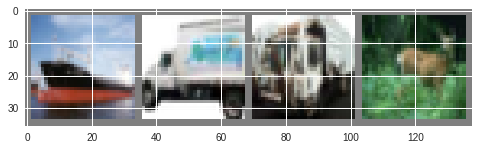

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [66]:
for epoch in range(2):  # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력을 받은 후,
        inputs, labels = data

        # Variable로 감싸고
        inputs, labels = Variable(inputs), Variable(labels)

        # 변화도 매개변수를 0으로 만든 후
        optimizer.zero_grad()

        # 학습 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 2.200
[1,  4000] loss: 1.855
[1,  6000] loss: 1.681
[1,  8000] loss: 1.575
[1, 10000] loss: 1.517
[1, 12000] loss: 1.466
[2,  2000] loss: 1.409
[2,  4000] loss: 1.392
[2,  6000] loss: 1.358
[2,  8000] loss: 1.318
[2, 10000] loss: 1.308
[2, 12000] loss: 1.289
Finished Training


GroundTruth:    cat  ship  ship plane


Exception NameError: "global name 'FileNotFoundError' is not defined" in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f1fcbd37750>> ignored


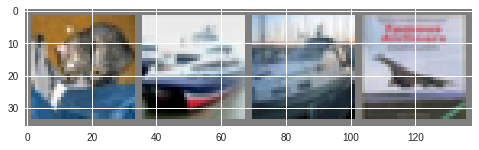

In [67]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(Variable(images))

In [69]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship   car   car  ship


In [70]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [71]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1




for i in range(10):
    s= 100 * int(class_correct[i]) / int(class_total[i])
    print('Accuracy of %5s : %2d %%' % (classes[i],s ))

Accuracy of plane :  0 %
Accuracy of   car :  1 %
Accuracy of  bird : 24 %
Accuracy of   cat :  2 %
Accuracy of  deer :  4 %
Accuracy of   dog : 16 %
Accuracy of  frog : 19 %
Accuracy of horse :  7 %
Accuracy of  ship :  0 %
Accuracy of truck :  1 %


In [72]:
net.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)